In [ ]:
!pip install vit-keras

     |████████████████████████████████| 706kB 24.7MB/s 


In [ ]:
!nvidia-smi

Sat Apr 17 07:06:01 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
img_size=[256,256]
train_dir='/content/drive/My Drive/data/train'
test_dir='/content/drive/My Drive/data/val'
!ls '/content/drive/My Drive/data/train'

cat  dog


In [ ]:
from vit_keras import vit, utils
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential,Model
from keras.optimizers import Adam

In [ ]:
image_size = 256
base_model = vit.vit_b16(
    image_size=image_size,
    activation='relu',
    pretrained=True,
    include_top=False,
    pretrained_top=False,
)

/usr/local/lib/python3.7/dist-packages/vit_keras/utils.py:79: UserWarning: Resizing position embeddings from 24 to 16
  UserWarning,


In [ ]:
print(base_model.summary())

Model: "vit-b16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
embedding (Conv2D)           (None, 16, 16, 768)       590592    
_________________________________________________________________
reshape_1 (Reshape)          (None, 256, 768)          0         
_________________________________________________________________
class_token (ClassToken)     (None, 257, 768)          768       
_________________________________________________________________
Transformer/posembed_input ( (None, 257, 768)          197376    
_________________________________________________________________
Transformer/encoderblock_0 ( ((None, 257, 768), (None, 7087872   
_________________________________________________________________
Transformer/encoderblock_1 ( ((None, 257, 768), (None, 7087

In [ ]:
for layer in base_model.layers:
    layer.trainable=False

print("Base model layers are freezed!!!")

Base model layers are freezed!!!


In [ ]:
print(base_model.summary())

Model: "vit-b16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
embedding (Conv2D)           (None, 16, 16, 768)       590592    
_________________________________________________________________
reshape_1 (Reshape)          (None, 256, 768)          0         
_________________________________________________________________
class_token (ClassToken)     (None, 257, 768)          768       
_________________________________________________________________
Transformer/posembed_input ( (None, 257, 768)          197376    
_________________________________________________________________
Transformer/encoderblock_0 ( ((None, 257, 768), (None, 7087872   
_________________________________________________________________
Transformer/encoderblock_1 ( ((None, 257, 768), (None, 7087

In [ ]:
x = Dropout(0.2)(base_model.output)
x = Flatten()(x)
x = Dense(2,'softmax')(x)

model = Model(inputs=base_model.input,outputs=x)

In [ ]:
print("Final Model is:\n",model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
embedding (Conv2D)           (None, 16, 16, 768)       590592    
_________________________________________________________________
reshape_1 (Reshape)          (None, 256, 768)          0         
_________________________________________________________________
class_token (ClassToken)     (None, 257, 768)          768       
_________________________________________________________________
Transformer/posembed_input ( (None, 257, 768)          197376    
_________________________________________________________________
Transformer/encoderblock_0 ( ((None, 257, 768), (None, 7087872   
_________________________________________________________________
Transformer/encoderblock_1 ( ((None, 257, 768), (None, 708787

In [ ]:
opt=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, decay=0.0, amsgrad=False)

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

In [ ]:
RANDOM_SEED=123
train_datagen = ImageDataGenerator(
    width_shift_range=0.4,
    height_shift_range=0.4,
    rescale=1.0/255,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(
    rescale=1.0/255,
)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    color_mode='rgb',
    target_size=img_size,
    batch_size=64,
    class_mode='categorical',
    seed=RANDOM_SEED
)


validation_generator = test_datagen.flow_from_directory(
    test_dir,
    color_mode='rgb',
    target_size=img_size,
    batch_size=64,
    class_mode='categorical',
    seed=RANDOM_SEED
)

Found 6001 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [ ]:
import time
start = time.time()
hist = model.fit(
    train_generator,
    epochs=15,
    validation_data = validation_generator
)

end = time.time()
print("Total time taken: ",end-start)

Epoch 1/15
94/94 [==============================] - 1467s 15s/step - loss: 0.2849 - accuracy: 0.8684 - val_loss: 0.0203 - val_accuracy: 0.9917
Epoch 2/15
94/94 [==============================] - 154s 2s/step - loss: 0.0594 - accuracy: 0.9777 - val_loss: 0.0189 - val_accuracy: 0.9917
Epoch 3/15
94/94 [==============================] - 151s 2s/step - loss: 0.0647 - accuracy: 0.9750 - val_loss: 0.0161 - val_accuracy: 0.9917
Epoch 4/15
94/94 [==============================] - 152s 2s/step - loss: 0.0445 - accuracy: 0.9838 - val_loss: 0.0156 - val_accuracy: 0.9917
Epoch 5/15
94/94 [==============================] - 151s 2s/step - loss: 0.0442 - accuracy: 0.9833 - val_loss: 0.0153 - val_accuracy: 0.9917
Epoch 6/15
94/94 [==============================] - 151s 2s/step - loss: 0.0428 - accuracy: 0.9832 - val_loss: 0.0152 - val_accuracy: 0.9917
Epoch 7/15
94/94 [==============================] - 150s 2s/step - loss: 0.0516 - accuracy: 0.9818 - val_loss: 0.0143 - val_accuracy: 0.9917
Epoch 8/15


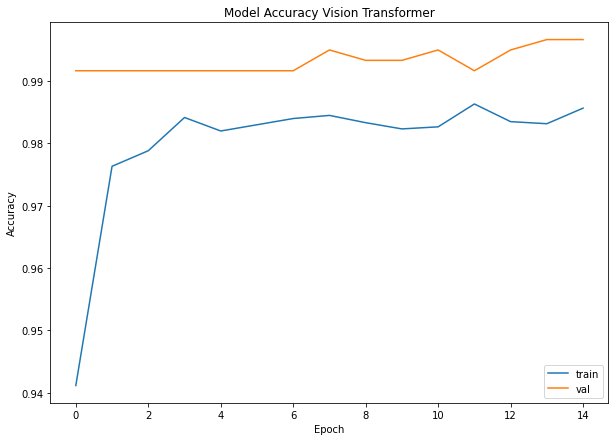

In [ ]:
# plotting the figure for accuracy
plt.figure(figsize=(10,7))
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy Vision Transformer')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

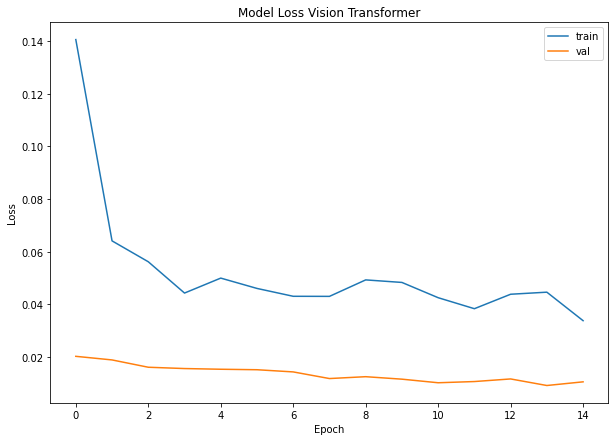

In [ ]:
# plotting the figure for loss
plt.figure(figsize=(10,7))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss Vision Transformer')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [ ]:
model.save('dogCat_vit.h5')